In [1]:
import geopandas
import pandas as pd
import numpy as np
import contextily as ctx

In [2]:
# Read the data in from the .csv file, show some basic information about the data
df = pd.read_csv('../data/2018_Central_Park_Squirrel_Census_-_Squirrel_Data_20250221.csv')
df.head(20)

,X,Y,Unique Squirrel ID,Hectare,Shift,Date,Hectare Squirrel Number,Age,Primary Fur Color,Highlight Fur Color,...,Kuks,Quaas,Moans,Tail flags,Tail twitches,Approaches,Indifferent,Runs from,Other Interactions,Lat/Long
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086)
1,-73.968857,40.783783,21B-AM-1019-04,21B,AM,10192018,4,NaN,NaN,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9688574691102 40.7837825208444)
2,-73.974281,40.775534,11B-PM-1014-08,11B,PM,10142018,8,NaN,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.97428114848522 40.775533619083)
3,-73.959641,40.790313,32E-PM-1017-14,32E,PM,10172018,14,Adult,Gray,NaN,...,False,False,False,False,False,False,False,True,NaN,POINT (-73.9596413903948 40.7903128889029)
4,-73.970268,40.776213,13E-AM-1017-05,13E,AM,10172018,5,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9702676472613 40.7762126854894)
5,-73.968361,40.772591,11H-AM-1010-03,11H,AM,10102018,3,Adult,Cinnamon,White,...,False,False,False,False,True,False,True,False,NaN,POINT (-73.9683613516225 40.7725908847499)
6,-73.954120,40.793181,36H-AM-1010-02,36H,AM,10102018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,False,False,NaN,POINT (-73.9541201789795 40.7931811701082)
7,-73.958269,40.791737,33F-AM-1008-02,33F,AM,10082018,2,Adult,Gray,NaN,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9582694312289 40.7917367820255)
8,-73.967429,40.782972,21C-PM-1006-01,21C,PM,10062018,1,Adult,Gray,NaN,...,False,False,False,True,True,False,False,False,NaN,POINT (-73.9674285955293 40.7829723919744)
9,-73.972250,40.774288,11D-AM-1010-03,11D,AM,10102018,3,Adult,Gray,Cinnamon,...,False,False,False,False,False,False,True,False,NaN,POINT (-73.9722500196844 40.7742879599026)


In [3]:
## Discover some basic information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3023 entries, 0 to 3022
Data columns (total 31 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   X                                           3023 non-null   float64
 1   Y                                           3023 non-null   float64
 2   Unique Squirrel ID                          3023 non-null   object 
 3   Hectare                                     3023 non-null   object 
 4   Shift                                       3023 non-null   object 
 5   Date                                        3023 non-null   int64  
 6   Hectare Squirrel Number                     3023 non-null   int64  
 7   Age                                         2902 non-null   object 
 8   Primary Fur Color                           2968 non-null   object 
 9   Highlight Fur Color                         1937 non-null   object 
 10  Combination 

### Column Details - Null Values

In the dataset, there are 3023 total records. For the following fields, there are no Null-values and nothing needs to be done to care for the fact of Null values in those columns. 
- X, Y, Unique Squirrel ID, Hectare, Shift, Date, Hectare Squirrel Number, Combination of Primary and Highlight Color, Running, Chasing, Climbing, Eating, Foraging, Kuks, Quaas, Moans, Tail Flags, Tail Twitches, Approaches, Indifferent, Runs from, Lat/long

The following columns are optional data records, so Null values are permissible: 
- Highlight Fur Color, Color Notes, Specific Location, Other Activities, Other Interactions

The following columns have Null-values in the dataset, and it is necessary to deal with those Null values for proper analysis
- Age, Primary Fur Color, Location, Above Ground Sighter Measurement


In [4]:
# Work with Primary Fur Color, discover how the values are distributed
print(f'Number of null values: {df['Primary Fur Color'].isna().sum()}')
df['Primary Fur Color'].value_counts()

Number of null values: 55


Primary Fur Color
Gray        2473
Cinnamon     392
Black        103
Name: count, dtype: int64

In [5]:
# Because most of the squirrels in our dataset are Gray, take all 55 squirrels with a color of Null, and make them have the color gray instead
df['Primary Fur Color'] = df['Primary Fur Color'].fillna('Gray')
print(f'Number of null values: {df['Primary Fur Color'].isna().sum()}')
df['Primary Fur Color'].value_counts()

Number of null values: 0


Primary Fur Color
Gray        2528
Cinnamon     392
Black        103
Name: count, dtype: int64

In [6]:
# Work with Age, discover how the values are distributed
print(f'Number of null values: {df['Age'].isna().sum()}')
df['Age'].value_counts()

Number of null values: 121


Age
Adult       2568
Juvenile     330
?              4
Name: count, dtype: int64

In [7]:
# turn all values that are equal to "?" to NaN.
df['Age'] = df['Age'].replace({'?': np.nan})

In [8]:
# Since most Squirrels are Adults, fill NaN squirrels for Age with the value "Adult"
df['Age'] = df['Age'].fillna('Adult')
print(f'Number of null values: {df['Age'].isna().sum()}')
df['Age'].value_counts()

Number of null values: 0


Age
Adult       2693
Juvenile     330
Name: count, dtype: int64

In [9]:
# Work with Location to discover what to do about Null values
print(f'Number of null values: {df['Location'].isna().sum()}')
df['Location'].value_counts()

Number of null values: 64


Location
Ground Plane    2116
Above Ground     843
Name: count, dtype: int64

In [10]:
# Since there is more of an even spread, drop any records where we don't have a recorded Location for the squirrel
df = df.dropna(subset=['Location'])
print(f'Number of null values: {df['Location'].isna().sum()}')

Number of null values: 0


In [11]:
# Work with Above Ground Sighter Measurement to discover what to do with null values
print(f'Number of null values: {df['Above Ground Sighter Measurement'].isna().sum()}')
df['Above Ground Sighter Measurement'].value_counts()

Number of null values: 50


Above Ground Sighter Measurement
FALSE    2116
10        116
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
1          30
8          30
40         25
50         19
7          19
12         16
13         11
35         10
28          7
18          5
100         5
45          4
9           4
17          3
60          3
14          2
24          2
23          2
65          2
11          2
43          2
16          2
33          1
31          1
80          1
0           1
180         1
55          1
70          1
19          1
Name: count, dtype: int64

In [12]:
# Squirrels with an Above Ground Sighter Measurement value of FALSE were actually found on the Ground Plane. This makes sense, as the number of squirrels founds on the ground plane is equal to the number of False values for this column
# For this column, we will clean up the Na values by replace them with the Median value, where not equal to False. 
subset_df = df[df['Above Ground Sighter Measurement'] != 'FALSE']
median_value = subset_df['Above Ground Sighter Measurement'].fillna(0).astype(int).replace(0, np.nan).median()
median_value = str(int(median_value))

# @TODO: figure out what to do about the fact that the new records are filling in with string '10.0' instead of '10'
df['Above Ground Sighter Measurement'] = df['Above Ground Sighter Measurement'].fillna(median_value).replace('10.0', '10')

In [13]:
print(f'Number of null values: {df['Above Ground Sighter Measurement'].isna().sum()}')
df['Above Ground Sighter Measurement'].value_counts()

Number of null values: 0


Above Ground Sighter Measurement
FALSE    2116
10        166
20         84
15         71
2          55
3          52
5          51
30         44
4          42
25         33
6          32
1          30
8          30
40         25
50         19
7          19
12         16
13         11
35         10
28          7
18          5
100         5
45          4
9           4
17          3
60          3
14          2
24          2
23          2
65          2
11          2
43          2
16          2
33          1
31          1
80          1
0           1
180         1
55          1
70          1
19          1
Name: count, dtype: int64

In [14]:
# Map of all squirrel sighting placed on a geographic map

# Setup a geopandas dataframe, with the X/Y points from the original dataframe
gdf = geopandas.GeoDataFrame(df, geometry=geopandas.points_from_xy(df.X, df.Y))

# Set the CRS of the GeoDataFrame to WGS 84 (EPSG:4326), which is the standard for latitude and longitude.
gdf.crs = "EPSG:4326"

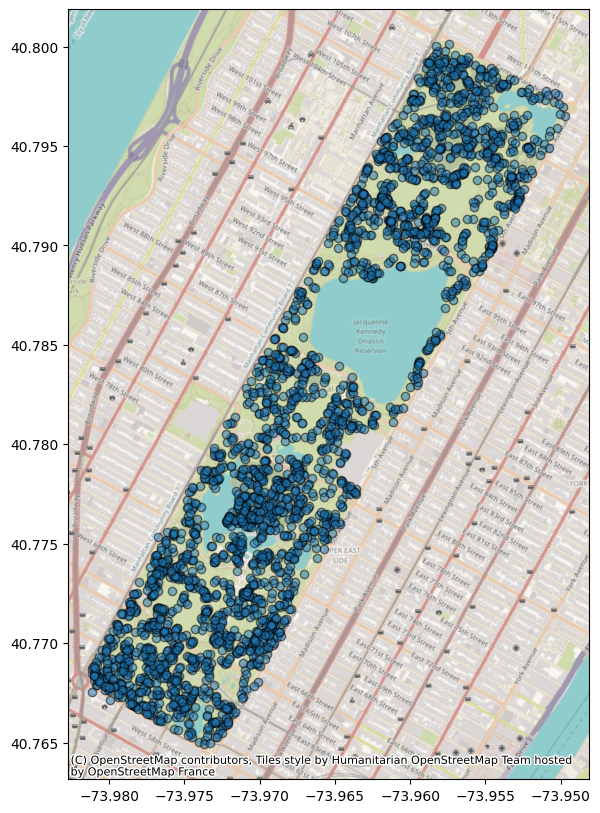

In [15]:
# Plot the map, using the plot method of the dataframe
ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, crs=gdf.crs)

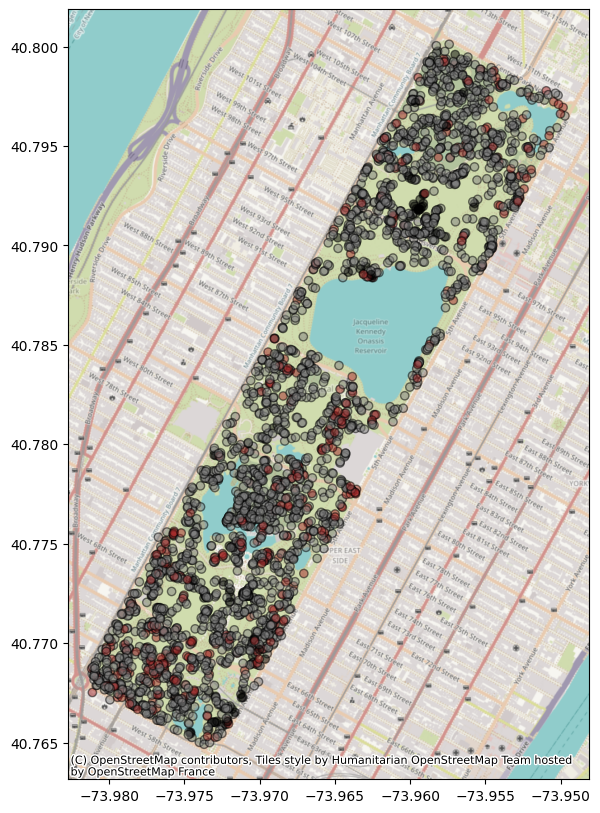

In [16]:
# Make the same map plot, but plot based upon color to get a better idea of where each squirrel lives. 
color_mapping_dict = {'Black': 'black', 'Gray': 'gray', 'Cinnamon': 'brown'}

ax = gdf.plot(figsize=(10, 10), alpha=0.5, edgecolor='k', color=gdf['Primary Fur Color'].map(color_mapping_dict))
ctx.add_basemap(ax, crs=gdf.crs)

In [17]:
# Check to see how the Primary color of a squirrel correlates with how whether or not they were sighted above ground
df[df['Location'] == 'Ground Plane']['Primary Fur Color'].value_counts(normalize=True)

Primary Fur Color
Gray        0.829868
Cinnamon    0.136106
Black       0.034026
Name: proportion, dtype: float64

In [18]:
df[df['Location'] == 'Above Ground']['Primary Fur Color'].value_counts(normalize=True)

Primary Fur Color
Gray        0.851720
Cinnamon    0.111507
Black       0.036773
Name: proportion, dtype: float64

In [19]:
# It appears that gray squirrels slightly more proportionally are found above ground than not, Cinnamon squirrels are more likely to be on the ground plane, and that Black squirrels are equally likely to be in both places. 


/var/folders/y9/3n_4xggx67q4b0ldt7wdzt6w0000gn/T/ipykernel_1714/3419049049.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  plot_df['Above Ground Sighter Measurement'] = plot_df['Above Ground Sighter Measurement'].astype(int)


<Axes: xlabel='Primary Fur Color'>

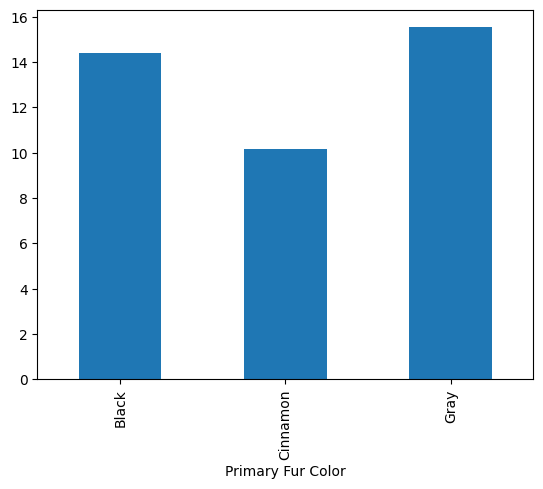

In [20]:
# For the squirrels found above ground, is there a difference in Primary Fur Color as to how high up they were found?
plot_df = df[df['Location'] == 'Above Ground']
plot_df['Above Ground Sighter Measurement'] = plot_df['Above Ground Sighter Measurement'].astype(int)
plot_df = plot_df.groupby(['Primary Fur Color'])['Above Ground Sighter Measurement'].mean()
plot_df.plot.bar(x='Primary Fur Color', y='Above Ground Sighter Measurement')

In [21]:
# We can see that Gray squirrels climb the farthest off the ground, black squirrels the next highest, and Cinnamon squirrels the lowest. 

Currently, the date column is a Text field with the month, day, and year. That information should be translated to a Datetime column, so that it can be correctly used later in the analysis.  

In [22]:
df['Date'] = pd.to_datetime(df['Date'], format="%m%d%Y")

In [23]:
# Now the information is in a usable format for working with dates
df['Date'].head()

2   2018-10-14
4   2018-10-17
6   2018-10-10
7   2018-10-08
8   2018-10-06
Name: Date, dtype: datetime64[ns]

Create some histograms and bar charts to show the distribution of the data

<Axes: xlabel='Shift'>

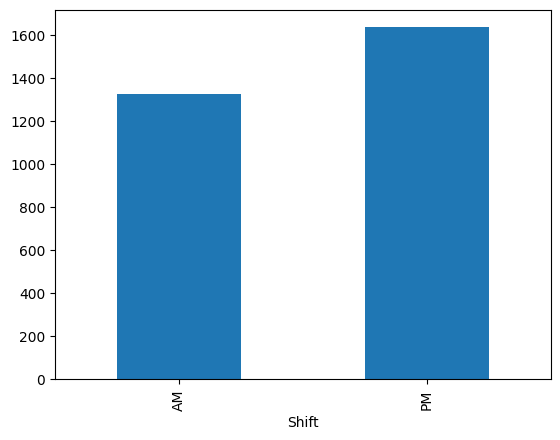

In [27]:
# Distribution of what shift the squirrel sighting occurred during
df.groupby(['Shift'])['Unique Squirrel ID'].count().plot(x='Shift', y='Unique Squirrel ID', kind='bar')

<Axes: >

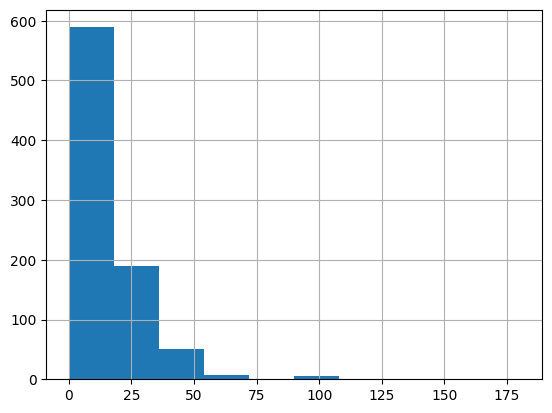

In [30]:
# Distribution of how far above ground the squirrels were found, if they were found above ground
df[df['Above Ground Sighter Measurement'] != 'FALSE']['Above Ground Sighter Measurement'].astype(int).hist()

<Axes: xlabel='Date'>

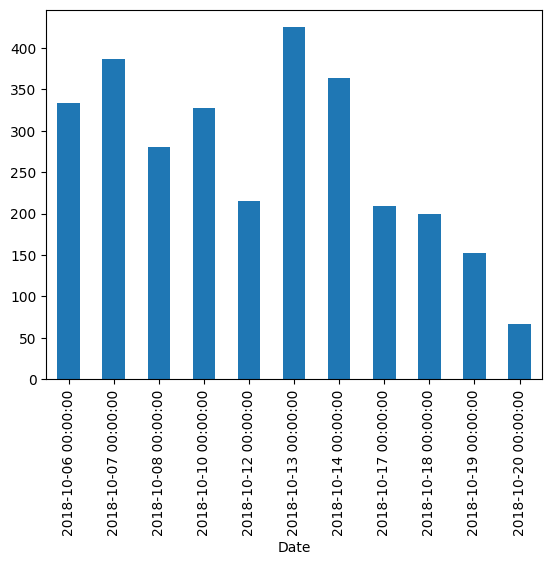

In [31]:
# Distribution of sightings over time
df.groupby(['Date'])['Unique Squirrel ID'].count().plot(x='Date', kind='bar')